In [1]:
import mglearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn.datasets import make_blobs

In [3]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [4]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [5]:
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

1.0
0.965034965034965


In [6]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

# depth를 깊게 안 내려가도 정확도가 높게 나온다.
# max_depth = 1 이면 한 단계에서 선택되는데, 적은 depth에서 정확도를 올리면 장점은 적은 메모리로 동작된다.
# 지금은 테스트를 위해 1단계만 진행했는데, 보통 gradientboosting은 4~5단계정도면 충분한데 5단계 정도에서도 학습이 과해지면 단계를 낮춰야 한다.

0.9906103286384976
0.972027972027972


In [7]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

# 학습정확도와 테스트정확도가 떨어졌다.
# learning_rate로 학습을 위해 얼마나 복잡한 모델을 만들지에 대한 복잡도를 제어할 수 있다.

0.9882629107981221
0.965034965034965


In [8]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.1)
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

# learning_rate를 0.1로 줬다. learning_rate는 학습량에 자체에 대한 제어이고 max_depth는 세세하게 깊이에 대해 제어를 줄 수 있다.
# 높은 확률의 accuracy를 갖는 모델을 만드는 게 목표다.

# GradientBoosting은 learning_rate와 max_depth를 제어할 수 있는 게 가장 큰 장점이다.
# 보정하는 알고리즘이 있어서 depth를 작게 써도 원하는 결과를 빨리 낼 수 있다. 속도도 빠르고 메모리도 적게쓰는 장점이 있다.

1.0
0.965034965034965


In [9]:
X, y = make_blobs(centers=4, random_state=8)

In [10]:
X

array([[ -1.72161036,  -1.48033142],
       [ -3.6573384 ,  -9.5482383 ],
       [  7.0778163 ,   0.99508772],
       [ -1.36579859,  -0.3148625 ],
       [ -2.66521206,  -3.12591651],
       [  7.63027116,   8.69797933],
       [ -5.27144331, -12.11880698],
       [  7.91767139,   1.41547387],
       [ -1.41284184,   0.11296348],
       [ -1.01519039,  -1.03318203],
       [  8.2634157 ,  10.34723435],
       [  6.96767867,   8.9622523 ],
       [ -0.84779249,  -2.12185612],
       [  7.48006237,   2.49392925],
       [  7.71454967,   1.8420701 ],
       [ -7.74064658,  -8.61800744],
       [ -5.41087235,  -8.7194128 ],
       [ -2.27579204,  -2.89699926],
       [ -1.25668449,  -2.33416219],
       [  7.61227907,   9.4463627 ],
       [  8.81545663,   8.76386046],
       [  7.1895354 ,   0.43090048],
       [  7.40292703,   9.16217702],
       [  5.17209648,  11.78064756],
       [ -2.10476115,  -1.57846672],
       [  6.5342397 ,   9.45532341],
       [  7.59635095,   8.0197955 ],
 

In [11]:
y
# 0, 1, 2, 3 으로 총 4개의 집합이 나온다.

array([3, 2, 1, 3, 3, 0, 2, 1, 3, 3, 0, 0, 3, 1, 1, 2, 2, 3, 3, 0, 0, 1,
       0, 0, 3, 0, 0, 3, 2, 1, 1, 3, 1, 3, 0, 2, 3, 0, 1, 2, 1, 3, 2, 2,
       0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 3, 2, 2, 2, 0, 3, 3, 2, 1, 2, 0, 1,
       3, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 2, 3, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       2, 3, 1, 0, 3, 2, 2, 1, 1, 3, 1, 1])

Text(0, 0.5, 'feature 1')

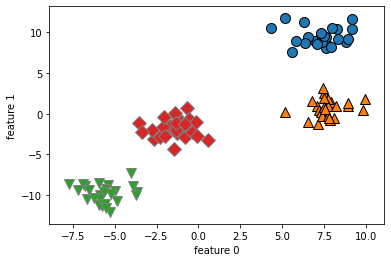

In [12]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

# 지금은 4개의 그룹으로 나오는데 2개의 그룹으로 만들고 싶다.
# 어떻게 합치면 될까? 0, 2 짝수로 하나, 1, 3 홀수로 하나를 만든다.

Text(0, 0.5, 'feature 1')

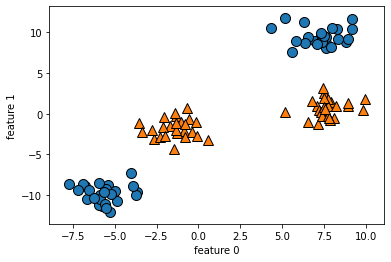

In [13]:
# 4개의 클래스를 2로 나눠서 두개의 그룹으로 만든다.

y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

# SVM
Support Vector Machine<br/>
사이킷런으로 접근하는 마지막 알고리즘<br/>
공식문서에 따르면 '무한 차원 공간에서 초평면 또는 초평면 세트를 구성한다' 라고 되어있다.

<img src="./images/0414_1.png" width=400px style="float:left">

A 그룹과 B 그룹을 기준선인 Separating Hyperplane으로 나눌 때 두 클래스 사이의 공간 자체를 마진이라 한다.<br/>
마진 공간자체를 Support Vector 라고 부른다.<br/>
공간을 타이트하게 관리하고 싶다는 것은 마진을 좁히고 싶다는 것이다.<br/>
매개변수 C 값을 어떻게 주냐에 따라 마진의 넓이가 결정된다.<br/>

중요한 개념 : 양 쪽 그룹으로 나누는 기준선, 마진, 매개변수 C 값

<img src="./images/0414_2.png" width=400px style="float:left">

2차원이 아닌 3차원으로 보는 이유?<br/>
우리가 만든 결과는 2차원에서는 예쁘게 자르려해도 예쁘게 잘라지지 않는다.<br/>
이럴 때 3차원으로 만들어서 자른다.<br/>

C:\Users\Nagyeom\AppData\Local\Temp/ipykernel_16064/3057223959.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


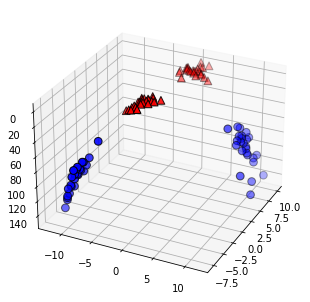

In [14]:
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60, edgecolor='k')

2D에서 해결하지 못해서 차원을 하나 더 올려서 3차원에서 해결한다.<br/>
3차원으로 가면 윗면과 아랫면인 '면'으로 가르기 시작한다.<br/>
3차원까지는 그릴 수 있지만, 그 이상으로는 그릴 수 없다. 하지만 그 이상의 차원도 존재한다. 3, 4, 5 ... 256차원 등<br/>

즉, N차원으로 올리면 N-1 갯수의 면만큼 자르면 된다.<br/>
평면을 그려서 해결할 수 있는데 이 평면이 어디까지 넓어질 지 모르기 때문에 초평면이라고 한다.<br/>
SVM은 초평면을 그려서 해결하는 알고리즘이라고 생각하면 된다.

# SVM 코드로 구현

In [15]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state = 0)
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train) # 훈련

SVC()

In [16]:
#정확도 분석
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.903755868544601
0.9370629370629371


전체를 3차원으로 그리고 그 중 일부로 학습을 했을 때 모델이 초평면을 그렸다.<br/>
테스트 데이터를 넣어서 분석했더니 초평면에 의해 93%가 정확하게 구별되었다는 결과가 나온 것이다.<br/>

SVC는 데이터가 정확하게 구별이 될 정도로 군집이 잘 되어있으면 높은 정확도를 얻을 수 있다.<br/>
오히려 데이터가 지저분하게 놓여있으면 트리계열 알고리즘을 쓰는 게 좋다.

Regression, Tree, SVM 계열 중 알고리즘을 놓고 결정하는 게 1차적인 문제다.<br/>
regression은 풀수 없는 문제들이 있다.<br/>
트리계열은 학습되어있는 범위안에서만 동작한다.<br/>
regression과 트리계열로 해결되지 않으면 차원을 높여서 SVM으로 해결할 수 있다.<br/>